# **Algoritmos de clasificación**
# ![](https://i.gifer.com/7ARb.gif)
Integrantes:


*   Esteban Nesci
*   Analía López
*   Alejandro Gómez Fernández
*   Rodrigo Robert


Consigna: Sobre el dataset llamado titanic.csv, vamos a realizar la creación e implementación de un Árbol de Decisión de Clasificación.

Desarrollar un Árbol de Decisión de Clasificación con el dataset propuesto llamado titanic.csv

Recomendaciones:
* Basarse en los entregables anteriores para la resolución de la presente actividad.
* Utilizar los ejemplos vistos y abordados en la sesión, identificando claramente la variable target “y”.
* Investigar a fondo sobre la librería Scikit-Learn y sus aplicaciones.

In [ ]:
#Importamos las librerias y el dataset
import pandas as pd
import numpy as np
import seaborn as sns

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#accedo a los datos
df = pd.read_csv("Titanic.csv", lineterminator='\n')

In [ ]:
# df.shape() retorna un Tuple asi: (filas, col)
print('Este dataset tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas.')
df.shape

Este dataset tiene 714 filas, y 6 columnas.


(714, 6)

In [ ]:
# devuelve las etiquetas de las columnas del marco de datos dado
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [ ]:
df2 = pd.DataFrame()
df2 = df

In [ ]:
# df2.shape() retorna un Tuple asi: (filas, col)
print('Este dataset tiene ' + str(df2.shape[0]) + ' filas, y ' + str(df2.shape[1]) + ' columnas.')
df2.shape

Este dataset tiene 714 filas, y 6 columnas.


(714, 6)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 33.6 KB


In [ ]:
df2.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0
5,0,1,0,54.0,0,0
6,0,3,0,2.0,3,1
7,1,3,1,27.0,0,2
8,1,2,1,14.0,1,0
9,1,3,1,4.0,1,1


          Survived    Pclass       Sex       Age     SibSp     Parch
Survived  1.000000 -0.359653  0.538826 -0.077221 -0.017358  0.093317
Pclass   -0.359653  1.000000 -0.155460 -0.369226  0.067247  0.025683
Sex       0.538826 -0.155460  1.000000 -0.093254  0.103950  0.246972
Age      -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119
SibSp    -0.017358  0.067247  0.103950 -0.308247  1.000000  0.383820
Parch     0.093317  0.025683  0.246972 -0.189119  0.383820  1.000000


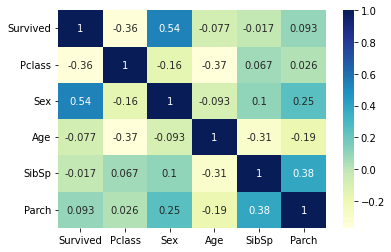

In [ ]:
print(df2.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)

In [ ]:
X = df2.drop("Survived", axis=1) #Elimino de mi dataset la variable a predecir
y = df2.Survived #Defino el Target

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0
...,...,...,...,...,...
709,3,1,39.0,0,5
710,2,0,27.0,0,0
711,1,1,19.0,0,0
712,1,0,26.0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()
# (with_mean=False, with_std=False)
X = ss.fit_transform(X)
X

array([[ 0.91123237, -0.75905134, -0.53037664,  0.52457013, -0.50589515],
       [-1.47636364,  1.31743394,  0.57183099,  0.52457013, -0.50589515],
       [ 0.91123237,  1.31743394, -0.25482473, -0.55170307, -0.50589515],
       ...,
       [-1.47636364,  1.31743394, -0.73704057, -0.55170307, -0.50589515],
       [-1.47636364, -0.75905134, -0.25482473, -0.55170307, -0.50589515],
       [ 0.91123237, -0.75905134,  0.15850313, -0.55170307, -0.50589515]])

### División&nbsp;de&nbsp;datos&nbsp;en&nbsp;conjuntos&nbsp;de&nbsp;entrenamiento&nbsp;y&nbsp;prueba


El siguiente codigo coloca el 70% de los datos en un conjunto de entrenamiento y el 30% de los datos en un conjunto de pruebas.

In [ ]:
#Importamos la libreria para separar en train y test
from sklearn.model_selection import train_test_split 

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

## ARBOL DE DECISIÓN 

In [ ]:
 #Importamos el modelo a usar
from sklearn.tree import DecisionTreeClassifier
#Creamos una instancia del modelo

tree = DecisionTreeClassifier(max_depth=3, random_state = 14) 

In [ ]:
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=14)

In [ ]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'% de aciertos sobre el set de entrenamiento: {train_accuracy:2.2%}')
print(f'% de aciertos sobre el set de evaluación: {test_accuracy:2.2%}')

% de aciertos sobre el set de entrenamiento: 83.57%
% de aciertos sobre el set de evaluación: 76.74%


Existe una alta porcentaje de aciertos en el set de entrenamiento y menor porcentaje de aciertos en el set de evaluación. Existe la posibildad de que nos estemos sobreajustando un poco.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_true=y_test,y_pred=tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81       126
           1       0.77      0.63      0.69        89

    accuracy                           0.77       215
   macro avg       0.77      0.75      0.75       215
weighted avg       0.77      0.77      0.76       215



In [ ]:
#Importancia de las variables

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
profundidad = list(range(1,15))
resultados_train = []
resultados_test  = []

for depth in profundidad:
    # instanciamos el modelo uniforme
    arbol = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_leaf=1, min_samples_split=2, ccp_alpha=0, class_weight="balanced")
    arbol.fit(X_train, y_train)
    y_train_pred = arbol.predict(X_train)
    y_pred = arbol.predict(X_test)
    resultados_train.append(accuracy_score(y_train, y_train_pred))
    resultados_test.append(accuracy_score(y_test, y_pred))

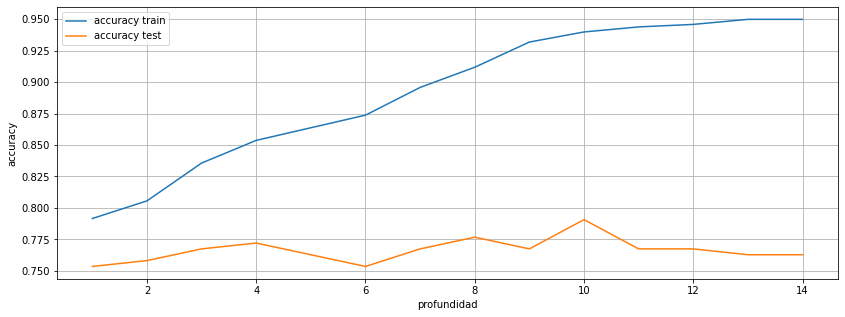

In [ ]:
# veamos que paso en cada caso
f, ax = plt.subplots(1,1,figsize=(14,5),sharey=True)
ax.plot(profundidad, resultados_train, profundidad, resultados_test);
plt.grid()
ax.legend(['accuracy train', 'accuracy test']);
ax.set(xlabel='profundidad',ylabel='accuracy');

In [ ]:
# veamos que pasa con un árbol sin corte de profundidad
np.random.seed(1912)
arbol = DecisionTreeClassifier(criterion='gini', ccp_alpha=0)
arbol.fit(X_train, y_train)
#print(classification_report(y_true=y_test,y_pred=arbol.predict(X_test)))
print('Exactitud en entrenamiento: %.3f' % accuracy_score(y_train,arbol.predict(X_train)))
print('Exactitud en test: %.3f' % accuracy_score(y_test,arbol.predict(X_test)))

Exactitud en entrenamiento: 0.950
Exactitud en test: 0.763


Existe una alta exactitud de entrenamiento y menor exactitud de prueba. Existe la posibildad de que nos estemos sobreajustando un poco.

### KNN

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=150, weights='distance')

knn.fit(X, y)

KNeighborsClassifier(n_neighbors=150, weights='distance')

In [ ]:
y_train_pred = knn.predict(X_train) #Prediccion en Train
y_test_pred = knn.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'% de aciertos sobre el set de entrenamiento: {train_accuracy:2.2%}')
print(f'% de aciertos sobre el set de evaluación: {test_accuracy:2.2%}')

% de aciertos sobre el set de entrenamiento: 93.79%
% de aciertos sobre el set de evaluación: 92.09%


Existe una alto porcentaje de aciertos sobre el set de entrenamiento y menor porcentaje de aciertos sobre el set de pruebas. Existe la posibildad de que nos estemos sobreajustando un poco.

In [ ]:
# veamos como le va a nuestro modelo variando la cantidad de vecinos y el tipo de peso
valores_k = list(range(1,50,4))
resultados_train_u = []
resultados_test_u  = []
resultados_train_w = []
resultados_test_w  = []

for k in valores_k:
    # instanciamos el modelo uniforme
    clf_u = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    clf_u.fit(X_train, y_train)
    y_train_pred = clf_u.predict(X_train)
    y_pred = clf_u.predict(X_test)
    resultados_train_u.append(accuracy_score(y_train, y_train_pred))
    resultados_test_u.append(accuracy_score(y_test, y_pred))

    clf_w = KNeighborsClassifier(n_neighbors=k, weights='distance')
    clf_w.fit(X_train, y_train)
    y_train_pred = clf_w.predict(X_train)
    y_pred = clf_w.predict(X_test)
    resultados_train_w.append(accuracy_score(y_train, y_train_pred))
    resultados_test_w.append(accuracy_score(y_test, y_pred))

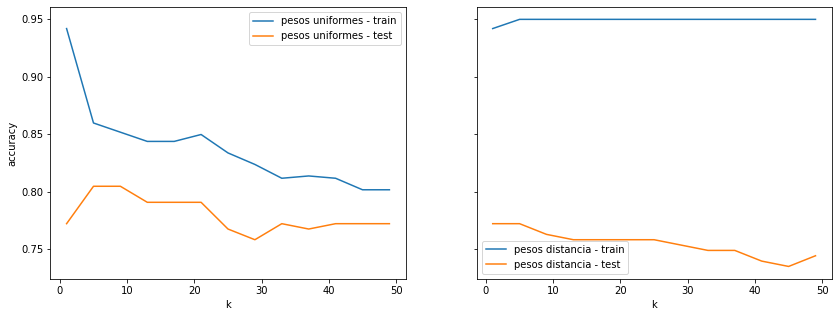

In [ ]:
# veamos que paso en cada caso
f, ax = plt.subplots(1,2,figsize=(14,5),sharey=True)
ax[0].plot(valores_k, resultados_train_u, valores_k, resultados_test_u);
ax[0].legend(['pesos uniformes - train', 'pesos uniformes - test']);
ax[0].set(xlabel='k',ylabel='accuracy');

ax[1].plot(valores_k, resultados_train_w, valores_k, resultados_test_w);
ax[1].legend(['pesos distancia - train', 'pesos distancia - test']);
ax[1].set(xlabel='k');

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

In [ ]:
# ahora busquemos nuestro mejor modelo usando validacion cruzada y gridsearchcv pero incluyamos otra distancia!
model = KNeighborsClassifier()
n_neighbors = np.array([1,2,3,5,8,13,21,34,55,89])
param_grid = {'n_neighbors': n_neighbors, 
              'weights':['uniform', 'distance'], 
              'metric':['euclidean', 'chebyshev', 'manhattan']}              
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)
pd.DataFrame(grid.cv_results_).sample(3)

{'metric': 'euclidean', 'n_neighbors': 34, 'weights': 'distance'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
33,0.000707,0.000023,0.001542,0.000017,chebyshev,21,distance,"{'metric': 'chebyshev', 'n_neighbors': 21, 'we...",0.74,0.79,0.86,0.85,0.828283,0.813657,0.043971,28
0,0.000800,0.000066,0.003017,0.000064,euclidean,1,uniform,"{'metric': 'euclidean', 'n_neighbors': 1, 'wei...",0.74,0.81,0.82,0.76,0.787879,0.783576,0.029994,54
46,0.000701,0.000018,0.003170,0.000026,manhattan,5,uniform,"{'metric': 'manhattan', 'n_neighbors': 5, 'wei...",0.77,0.81,0.86,0.81,0.797980,0.809596,0.029133,35


### RANDOM FOREST

In [ ]:
#Carga de las librerías
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=14, n_estimators=150,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=150, random_state=14)

In [ ]:
y_train_pred = model.predict(X_train) #Prediccion en Train
y_test_pred = model.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'% de aciertos sobre el set de entrenamiento: {train_accuracy:2.2%}')
print(f'% de aciertos sobre el set de evaluación: {test_accuracy:2.2%}')

% de aciertos sobre el set de entrenamiento: 94.99%
% de aciertos sobre el set de evaluación: 78.60%


Existe una alto porcentaje de aciertos sobre el set de entrenamiento y menor porcentaje de aciertos sobre el set de evaluación. Existe la posibildad de que nos estemos sobreajustando un poco.

## REGRESION LOGISTICA

In [ ]:
#Entrenamos un modelo de regresión logística

# Paso 3: importamos la clase LogisticRegresion de scikit-learn
from sklearn.linear_model import LogisticRegression

# Paso 4: Creamos una instancia de la Regresión Logística
regresion_logistica = LogisticRegression()

# Paso 5: Entrenamos la regresión logística con los datos de entrenamiento
regresion_logistica.fit(X,y)

LogisticRegression()

In [ ]:
y_train_pred = regresion_logistica.predict(X_train) #Prediccion en Train
y_test_pred = regresion_logistica.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'% de aciertos sobre el set de entrenamiento: {train_accuracy:2.2%}')
print(f'% de aciertos sobre el set de evaluación: {test_accuracy:2.2%}')

% de aciertos sobre el set de entrenamiento: 81.96%
% de aciertos sobre el set de evaluación: 78.60%


Existe una alto porcentaje de aciertos en el set de entrenamiento y menor porcentaje de aciertos en el set de evaluación. Existe la posibildad de que nos estemos sobreajustando un poco.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1678f438-dd57-41c5-b88b-bfcde7b7ccb5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>